In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from floris.layout_visualization import plot_turbine_labels, plot_turbine_points

from flasc.model_fit.cost_library import total_wake_loss_error
from flasc.model_fit.model_fit import ModelFit
from flasc.model_fit.opt_library import sweep_across_sectors, sweep_opt_pair, sweep_sector

In [2]:
# Load the data from previous example
with open("farm_data.pkl", "rb") as f:
    data = pickle.load(f)

# Unpack
df_jensen = data["df_jensen"]
df_gch = data["df_gch"]
df_emg = data["df_emg"]
df_turbo = data["df_turbo"]
fmodel_emg = data["fmodel_emg"]
fmodel_emg_unc = data["fmodel_emg_unc"]

In [3]:
# Define a list of parameters to tune
parameter_list = [
    ("wake", "wake_velocity_parameters", "empirical_gauss", "wake_expansion_rates"),
    ("wake", "wake_velocity_parameters", "empirical_gauss", "wake_expansion_rates"),
]

parameter_name_list = ["we_1", "we_2"]

parameter_range_list = [(0.001, 0.05), (0.001, 0.05)]

parameter_index_list = [0, 1]

In [4]:
# Define the ModelFit object


# Now pass the above cost function to the ModelFit class
mf = ModelFit(
    df_jensen,
    fmodel_emg,
    total_wake_loss_error,
    parameter_list=parameter_list,
    parameter_name_list=parameter_name_list,
    parameter_range_list=parameter_range_list,
    parameter_index_list=parameter_index_list,
)

<Axes: >

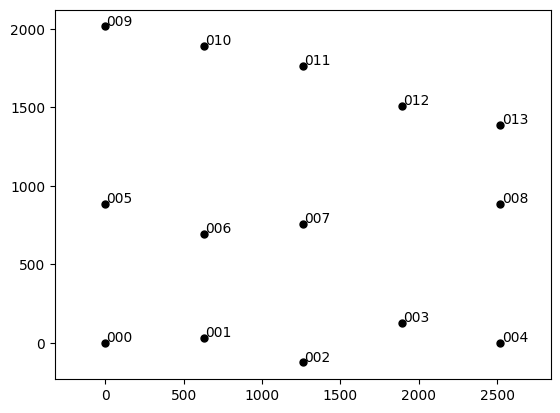

In [5]:
## Try a few optimizations

# Show the layout again

fig, ax = plt.subplots()
plot_turbine_points(fmodel_emg, ax)
plot_turbine_labels(fmodel_emg, ax)

In [6]:
# Try sweep_opt_pair for 11 and 7
sweep_opt_pair(mf, 0, 5, verbose=True)

Optimizing parameter 'we_1' (1/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_1': 0.017333333333333333
Optimizing parameter 'we_2' (2/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)
..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_2': 0.001
Optim

{'parameter_values': array([0.01733333, 0.001     ]),
 'parameter_values_sweep_record': {'we_1': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
         0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
  'we_2': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
         0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ])},
 'cost_values_record': {'we_1': array([ 6.33507919,  2.97039228,  0.63964126,  0.02473947,  0.96716046,
          3.1663129 ,  6.4249327 , 10.58654089, 15.36666226, 20.4865327 ]),
  'we_2': array([0.02473947, 0.02473947, 0.02473947, 0.02473947, 0.02473947,
         0.02473947, 0.02473947, 0.02473947, 0.02473947, 0.02473947])}}

In [7]:
sweep_sector(mf, sector=10, wind_radius=15.0, verbose=True)

Shape of df_ after filtering: (78, 17)
Min/Max Wind Direction (0 -- 360): 0.0, 360.0
Min/Max Wind Direction (-180 -- +180): -4.0, 24.0
Upstream turbines for sector 10: [9, 10, 11, 12, 13]
Downstream turbines for sector 10: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Optimizing parameter 'we_1' (1/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_1': 0.017333333333333333
Optimizing parameter 'we_2' (2/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)
..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_2': 0.028222222

{'parameter_values': array([0.01733333, 0.02822222]),
 'parameter_values_sweep_record': {'we_1': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
         0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
  'we_2': array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
         0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ])},
 'cost_values_record': {'we_1': array([15.87384793,  7.78698061,  2.47192461,  0.14550732,  0.5149939 ,
          2.92234001,  6.75602188, 11.54304207, 16.88192727, 22.40038512]),
  'we_2': array([0.31507107, 0.17535273, 0.08540892, 0.03136656, 0.00517559,
         0.00059004, 0.01278274, 0.03829235, 0.07434664, 0.11758723])}}

In [8]:
sweep_across_sectors(mf, wd_sectors=np.arange(0, 360, 45.0), wind_radius=22.5)

Starting optimization across 8 sectors
Optimizing for sector 1/8 (0.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 2/8 (45.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 3/8 (90.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 4/8 (135.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 5/8 (180.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 6/8 (225.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 7/8 (270.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing for sector 8/8 (315.0 degrees)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


{'mean_parameters': array([0.01869444, 0.00576389]),
 'median_parameters': array([0.01733333, 0.00372222]),
 'max_parameters': array([0.02277778, 0.02277778]),
 'min_parameters': array([0.01188889, 0.001     ]),
 'std_parameters': array([0.00360116, 0.00690688]),
 'res_mat': array([[0.01188889, 0.02277778],
        [0.02277778, 0.001     ],
        [0.01733333, 0.001     ],
        [0.02277778, 0.001     ],
        [0.01733333, 0.001     ],
        [0.01733333, 0.00644444],
        [0.01733333, 0.00644444],
        [0.02277778, 0.00644444]]),
 'wd_sectors': array([  0.,  45.,  90., 135., 180., 225., 270., 315.])}